# Bird counting quickstart
This project is a proof-of-concept tool to automatically count colonially nesting waterbirds from drone imagery, developed initialy on Straw-necked Ibis at Narran Lakes.

The purpose of developing a tool to automatically count colonially nesting waterbirds is to allow accurate,
repeatable and timely monitoring of large colonies. It is envisioned that a user would be able to input drone
imagery and with minimal technical skill derive an accurate count of waterbirds.



This project contains 3 requirements files: 

|File|Type  |Contents  |
|--|--|--|
|requirements.txt|pip| minimal requirment to run the model and label datasets|
|Env.txt| Conda | the python 3.9 enviroment we are runing this project on
|Envrequirements.txt| pip | the packages we have installed on on our enviroment|

To set up the enviroment to run this notebook run the folloing in a termial if you have not already 


create environment and add it as a kernel:
```bash
cd bird-counting
conda create -n waterbirds python=3.9 

conda activate waterbirds 

conda install --file Env.txt

pip3 install -r Envrequirements.txt

pip3 install -r requirements.txt

export PYTHONPATH=$PWD

pip3 install ipykernel 

python -m ipykernel install --user --name=waterbirds
```

In [1]:
# find root location useing this notebook's location and set a project folder to get images from and save results to

import os as os
ipynb_path = os.path.dirname(os.path.realpath("__file__"))
rootfolder =ipynb_path.removesuffix("/notebooks")
if (rootfolder.startswith("/mnt")): # if using mounted storage in AzureML we need to point to the local path
    import re
    m =re.search("/clusters/[^/]*(.*)", rootfolder)
    rootfolder ="/home/azureuser/cloudfiles/" + m.group(1)
    print(rootfolder)
projectfolder = 'testproject'

os.chdir(rootfolder)

/home/azureuser/cloudfiles//code/Users/Ben.Bradshaw/git/birds


In [2]:
!export PYTHONPATH=$rootfolder

# Display images to count birds in from the project folder

testprojectHeapsofBirds.JPG


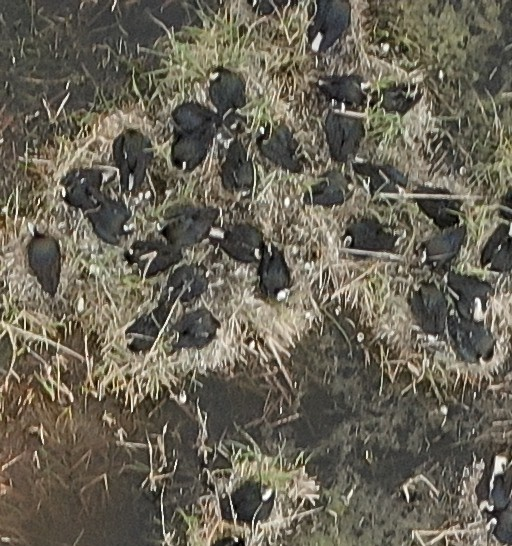

In [3]:
from IPython.display import Image
path = rootfolder + "/" + projectfolder +"/"
files = os.listdir(path)
for image in files:
    if image.endswith(".JPG"):
        print(projectfolder +image)
        display(Image(filename= path + image ) )
       

In [4]:

script = rootfolder + "/scripts/bird_count.py" 
print("running: " +script)
print("on folder " + projectfolder)

%run $script --project-folder testproject --data-root ./ --output-folder $projectfolder --conf-thresh 0.9 --save-slices 1

running: /home/azureuser/cloudfiles//code/Users/Ben.Bradshaw/git/birds/scripts/bird_count.py
on folder testproject


/anaconda/envs/waterbirds/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Scanning slices in HeapsofBirds.JPG:   0%|          | 0/589 [00:00<?, ?it/s]/anaconda/envs/waterbirds/lib/python3.9/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]

Counting birds in testproject: 100%|██████████| 1/1 [00:48<00:00, 48.78s/it]          


# Show slices and results

testprojectHeapsofBirds.JPG_l-0000_t-0000.jpg


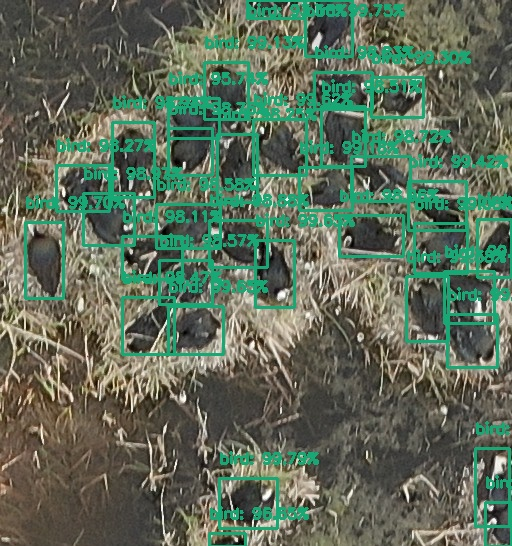

testprojectHeapsofBirds.JPG_l-0000_t-0273.jpg


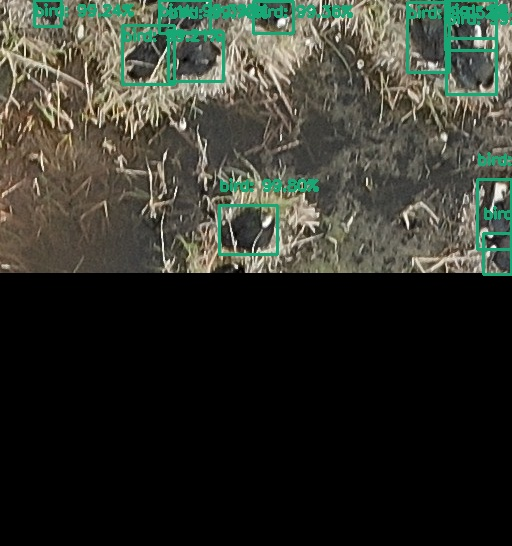

testprojectHeapsofBirds.JPG_l-0256_t-0000.jpg


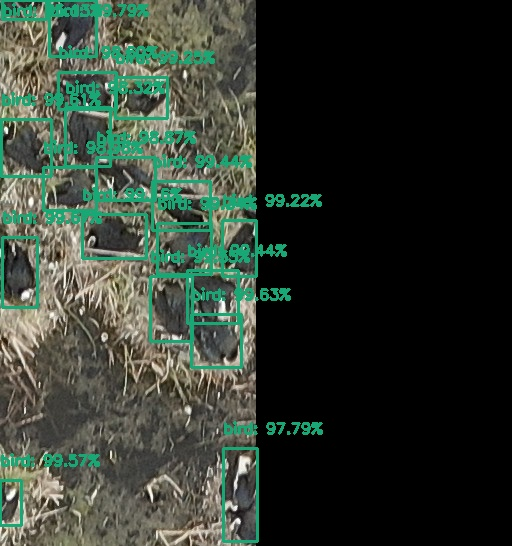

testprojectHeapsofBirds.JPG_l-0256_t-0273.jpg


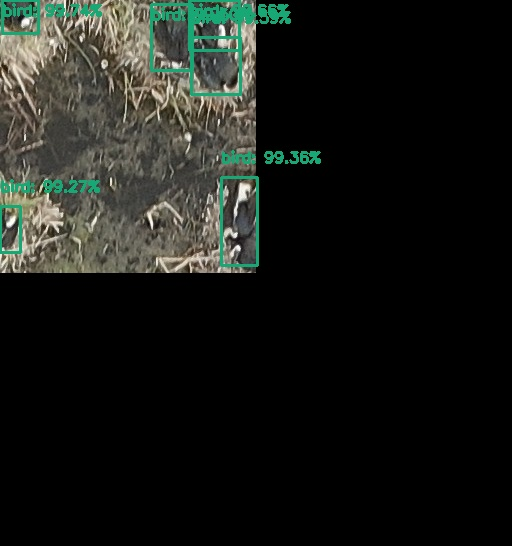

In [5]:
import pandas as pd
path = rootfolder + "/" + projectfolder + "/" + projectfolder + "_detections/"
files = os.listdir(path)
for image in files:
    if image.endswith(".jpg"):
        print(projectfolder +image)
        display(Image(filename= path + image ) )
        

        

In [12]:
pd.read_csv( rootfolder + "/" + projectfolder + "/" + projectfolder+"_detections.csv")

,FILENAME,COUNT
0,HeapsofBirds.JPG,21
